In [65]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
from datetime import datetime


# List of CO Marijuana Dispensaries

In [2]:
#The list of licensed marijuana dispensaries was downloaded as an Excel file
#from this site:  https://www.colorado.gov/pacific/enforcement/med-licensed-facilities

#read in the marijuana businesses from csv and put into a dataframe
mj_stores_df = pd.read_csv('CO Recreational Marijuana Stores.csv')
mj_stores_df.head()

,Licensee,DBA,License #,Street,City,Zip
0,10185 RIDGE LLC,EVERBLOOM,402R-00763,10185 West 49th Avenue,Wheat Ridge,80033
1,1-11 LLC,1:11,402R-00581,17034 Highway 17,Moffat,81143
2,1617 WAZEE STREET LLC,LODO WELLNESS CENTER,402R-00081,"1617 Wazee Street, Unit B",Denver,80202
3,2760 HAMPDEN INC,THE FIRE PLACE,402R-00757,2800 West Hampden Avenue,Sheridan,80110
4,3B FEDERAL1 LLC,BUDDY BOY,402R-00664,155 North Federal Boulevard,Denver,80219


In [66]:
#Get a count of dispensaries in each city
mj_cities_count = mj_stores_df.groupby('City').count()
mj_cities_count.head()

,Licensee,DBA,License #,Street,Zip
City,,,,,
Alma,2,1,2,2,2
Antonito,3,1,3,3,3
Aspen,7,7,7,7,7
Aurora,23,17,23,23,23
Avon,4,4,4,4,4


In [67]:
#Put the cities count into a dataframe which we'll use to merge with all of the housing data
mj_cities_count_df = mj_cities_count.reset_index()
mj_cities_count_df = mj_cities_count_df.rename(columns={'Licensee': 'Store_Count'})

mj_cities_count_df = mj_cities_count_df.drop(columns={'DBA', 'License #', 'Street', 'Zip'})
mj_cities_count_df.head()


,City,Store_Count
0,Alma,2
1,Antonito,3
2,Aspen,7
3,Aurora,23
4,Avon,4


# Housing Valuation Data

In [68]:
#The Zillow website has a research section that allows you to download all
# sorts of housing data:  https://www.zillow.com/research/data/
# I downloaded an Excel file called "ZHVI (Zillow Housing Value Index) Summary"
# for this analysis.

#Import CSV file of Colorado home valuation by zip code from January 2010 - July 2018
zillow_df = pd.read_csv('Zillow_CO_Home_Value_Index.csv')
zillow_df.head()

#len(zillow_df)
#result is 258 zip codes which translates to 149 unique cities

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,93194,80002,Arvada,CO,Denver,Jefferson,5587,184700.0,185000.0,184600.0,...,347200,352500,357700,363000,367600,370800,372100,373900,375800,376800
1,93195,80003,Arvada,CO,Denver,Jefferson,2257,186700.0,186900.0,187300.0,...,342800,346400,350300,354700,358900,361800,363400,364800,366100,366900
2,93196,80004,Arvada,CO,Denver,Jefferson,2029,214100.0,214400.0,214300.0,...,384100,386800,389600,394300,399500,403300,404200,404000,404200,404800
3,93197,80005,Arvada,CO,Denver,Jefferson,3875,252600.0,252900.0,252900.0,...,418500,419800,421300,424400,427800,429800,429400,428600,428900,430100
4,93199,80007,Arvada,CO,Denver,Jefferson,7864,414000.0,414900.0,413900.0,...,579600,579600,578300,582100,589700,595800,598700,601300,603000,603100


In [69]:
#Summarize the CO home valuation dataframe by decade

#Create a new empty dataframe to hold the decades by city
zillow_df_sum = pd.DataFrame(columns=['City', '2010', '2011', '2012', '2013', '2014',
                                      '2015', '2016', '2017', '2018'])

#Load the cities into the new summary dataframe
zillow_df_sum['City'] = zillow_df['City']

#Calculate the average home value index (HVI) for each decade and append it to the new dataframe
zillow_df_sum['2010'] = round(zillow_df.iloc[:, -103:-91].mean(axis=1), 0)
zillow_df_sum['2011'] = round(zillow_df.iloc[:, -91:-79].mean(axis=1), 0)
zillow_df_sum['2012'] = round(zillow_df.iloc[:, -79:-67].mean(axis=1), 0)
zillow_df_sum['2013'] = round(zillow_df.iloc[:, -67:-55].mean(axis=1), 0)
zillow_df_sum['2014'] = round(zillow_df.iloc[:, -55:-43].mean(axis=1), 0)
zillow_df_sum['2015'] = round(zillow_df.iloc[:, -43:-31].mean(axis=1), 0)
zillow_df_sum['2016'] = round(zillow_df.iloc[:, -31:-19].mean(axis=1), 0)
zillow_df_sum['2017'] = round(zillow_df.iloc[:, -19:-7].mean(axis=1), 0)
zillow_df_sum['2018'] = round(zillow_df.iloc[:, -7:].mean(axis=1), 0)

zillow_df_sum.head()


,City,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arvada,182758.0,172667.0,178025.0,195475.0,223100.0,264000.0,300667.0,337842.0,371429.0
1,Arvada,187267.0,180242.0,186417.0,204825.0,226567.0,265442.0,303717.0,337267.0,362371.0
2,Arvada,213025.0,208775.0,217150.0,231358.0,255917.0,297650.0,346867.0,380417.0,402043.0
3,Arvada,251450.0,244542.0,254000.0,276817.0,301075.0,339292.0,377967.0,412917.0,428429.0
4,Arvada,410225.0,407950.0,415908.0,441367.0,466367.0,508400.0,545400.0,575333.0,596243.0


In [70]:
#group the df by city
zillow_df_sum = round(zillow_df_sum.groupby('City').mean(), 0)

#Reset the index to turn it into a dataframe
zillow_df_sum = zillow_df_sum.reset_index()
zillow_df_sum.head()

,City,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alamosa,114258.0,109383.0,114658.0,121150.0,129783.0,134650.0,147025.0,160425.0,166771.0
1,Allenspark,201708.0,184200.0,197733.0,218383.0,228883.0,237075.0,263858.0,293000.0,315171.0
2,Arvada,248945.0,242835.0,250300.0,269968.0,294605.0,334957.0,374924.0,408755.0,432103.0
3,Aspen,972666.0,949192.0,933466.0,981100.0,1034666.0,1074420.0,1063858.0,1069916.0,1148972.0
4,Ault,150175.0,140275.0,152625.0,169292.0,183633.0,209508.0,239450.0,268108.0,287171.0


In [71]:
#The above dataframe has housing prices for all cities.  Now make a 
# dataframe that only includes only those cities with marijuana dispensaries
 
mj_housing_df = pd.merge(mj_cities_count_df, zillow_df_sum, on='City')
mj_housing_df.head()


,City,Store_Count,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aspen,7,972666.0,949192.0,933466.0,981100.0,1034666.0,1074420.0,1063858.0,1069916.0,1148972.0
1,Aurora,23,181907.0,172858.0,178409.0,200818.0,223205.0,258412.0,292412.0,320428.0,344172.0
2,Avon,4,493342.0,432175.0,417308.0,438283.0,479875.0,519075.0,572817.0,604108.0,637143.0
3,Bailey,2,226192.0,205550.0,205133.0,212567.0,223467.0,242750.0,265417.0,306167.0,339514.0
4,Basalt,2,556833.0,504283.0,480033.0,451592.0,495758.0,567350.0,597442.0,615608.0,667086.0


In [73]:
#Make a dataframe of housing prices for cities with no dispensaries

#First use an outer join to get data from both dataframes
all_housing_df = pd.merge(mj_cities_count_df, zillow_df_sum, on='City', how='right')

#Fill in the NaN values with 0 so that we can locate them and create
# a dataframe with cities that have no mj stores

values = {'Store_Count' : 0}
all_housing_df = all_housing_df.fillna(value = values)

no_mj_housing_df = all_housing_df[all_housing_df['Store_Count'] == 0]
no_mj_housing_df = no_mj_housing_df.reset_index(drop=True)
no_mj_housing_df.head()

,City,Store_Count,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alamosa,0.0,114258.0,109383.0,114658.0,121150.0,129783.0,134650.0,147025.0,160425.0,166771.0
1,Allenspark,0.0,201708.0,184200.0,197733.0,218383.0,228883.0,237075.0,263858.0,293000.0,315171.0
2,Arvada,0.0,248945.0,242835.0,250300.0,269968.0,294605.0,334957.0,374924.0,408755.0,432103.0
3,Ault,0.0,150175.0,140275.0,152625.0,169292.0,183633.0,209508.0,239450.0,268108.0,287171.0
4,Bayfield,0.0,247275.0,233817.0,233550.0,243592.0,259725.0,266450.0,278350.0,295050.0,306314.0


# Build the Plots

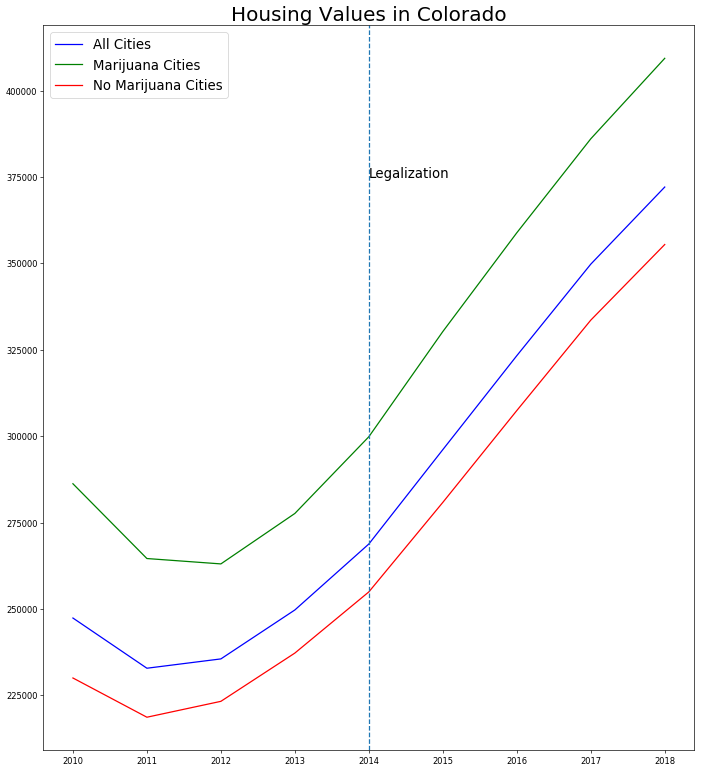

In [57]:
#Plot Housing Value by Decade for cities with and without dispensaries
fig = plt.figure(figsize=(14, 16), dpi=60)

#get the average housing values for the whole state of Colorado
state_avg = round(zillow_df_sum.mean(), 0)

#get the average housing values for cities with marijuana shops
mj_avg = round(mj_housing_df.mean(), 0)
mj_avg = mj_avg.drop(labels='Store_Count')

#get the average housing values for cities with no marijuana shops
no_mj_avg = round(no_mj_housing_df.mean(), 0)
no_mj_avg = no_mj_avg.drop(labels='Store_Count')
    
#create a plot that has a line graph for each of the above housing value statistics
years = ["2010","2011","2012","2013","2014", "2015", "2016", "2017", "2018"]

state_value_avg, = plt.plot(years, state_avg, color="blue", label="All Cities")
mj_value_avg, = plt.plot(years, mj_avg, color="green", label="Marijuana Cities")
no_mj_value_avg, = plt.plot(years, no_mj_avg, color="red", label="No Marijuana Cities")

# Create a legend
plt.legend(handles=[state_value_avg, mj_value_avg, no_mj_value_avg], loc="best", prop={'size': 16})

line_label = 'Legalization'
plt.title("Housing Values in Colorado", size=24)
plt.axvline(x='2014', ls='dashed', label=line_label)

plt.text('2014', 375000, 'Legalization', size=16)

#Save the plot
plt.savefig("Images/3-Housing-Comparison.png")

In [80]:
#Build a plot that compares housing prices in cities with a lot of dispensaries 
# to to cities with none.  Consider population size to ensure cities in both 
# dataframes have robust population sizes

#Load a dataframe with CO population by city
city_population_df = pd.read_csv('Colorado City Population.csv')

#Merge the population with the all cities housing valuation dataframe
all_housing_pop_df = pd.merge(all_housing_df, city_population_df, left_on = 'City', right_on = 'Name')
all_housing_pop_df = all_housing_pop_df.drop(columns='Name')

#Get the top ten cities with the most stores and their associated population values
top_10_mj_df = all_housing_pop_df.sort_values(by=['Store_Count'], ascending=False)
top_10_mj_df['Store_Count'] = top_10_mj_df['Store_Count'].astype(int)
top_10_mj_df['Store_Count'] = top_10_mj_df['Store_Count'].astype(str)
top_10_mj_df = top_10_mj_df.head(11)

#Append a column into the dataframe that has the city and number of stores 
# this will faciliate our x-axis labels on the bar chart 
top_10_mj_df['CityStores'] = top_10_mj_df['City'] + " (" + top_10_mj_df['Store_Count'] + ")"

#Drop Aspen because it skews the y-axis too much.  It's prices are not representative of the state.
top_10_mj_df = top_10_mj_df.set_index('CityStores', drop=True)
top_10_mj_df = top_10_mj_df.drop(columns='City')
top_10_mj_df = top_10_mj_df.drop('Aspen (7)')

#Get the top five most populated cities with the no stores
top_10_nomj_df = all_housing_pop_df[all_housing_pop_df['Store_Count'] == 0]
top_10_nomj_df = top_10_nomj_df.sort_values(by=['2018 Population'], ascending=False)
top_10_nomj_df = top_10_nomj_df.reset_index()
top_10_nomj_df = top_10_nomj_df.set_index('City', drop=True)
top_10_nomj_df = top_10_nomj_df.drop(columns='index')
top_10_nomj_df = top_10_nomj_df.head(10)

<Figure size 960x840 with 0 Axes>

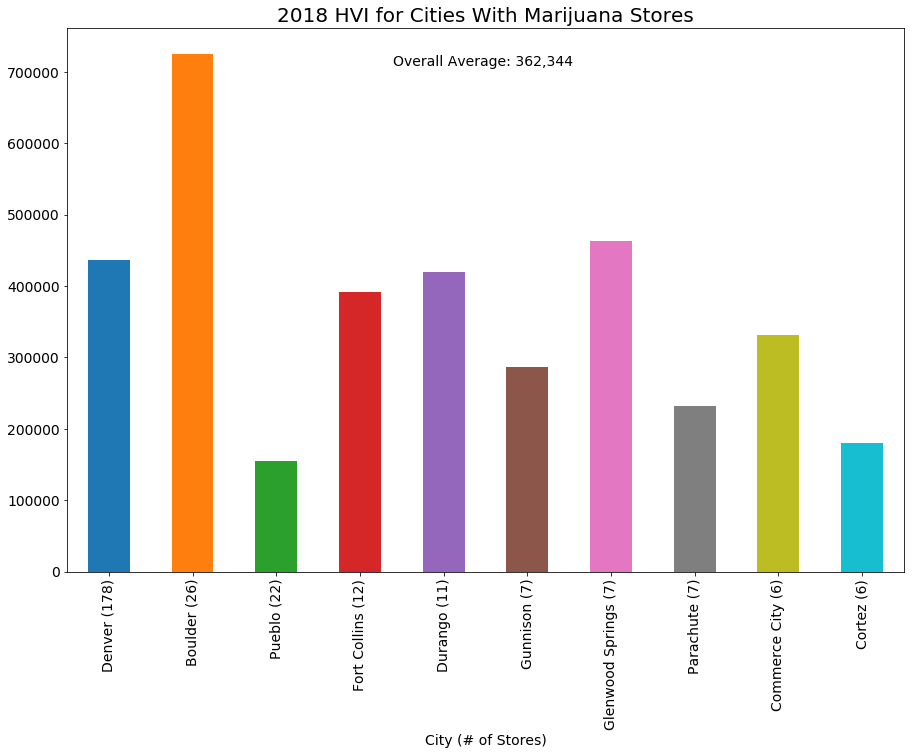

In [77]:
#Plot 2018 housing values for cities with marijuana stores-top ten

fig = plt.figure(figsize=(16, 14), dpi=60)
overall_mj_avg = round(top_10_mj_df['2018'].mean(), 0)
overall_mj_avg = int(overall_mj_avg)
overall_mj_avg = "{:,}".format(overall_mj_avg)

overall_mj_text = f'Overall Average: {overall_mj_avg} '

ax = top_10_mj_df.plot(kind="bar", y="2018", figsize=(15, 10), legend=False, fontsize=14)
ax.set_xlabel('City (# of Stores)', size=14)
ax.set_title('2018 HVI for Cities With Marijuana Stores', size=20)
ax.text(.5, .95, overall_mj_text, horizontalalignment='center', verticalalignment='top', transform=ax.transAxes, size=14)

#Save the plot
plt.savefig("Images/2018 HVI for Cities With MJ Stores.png")

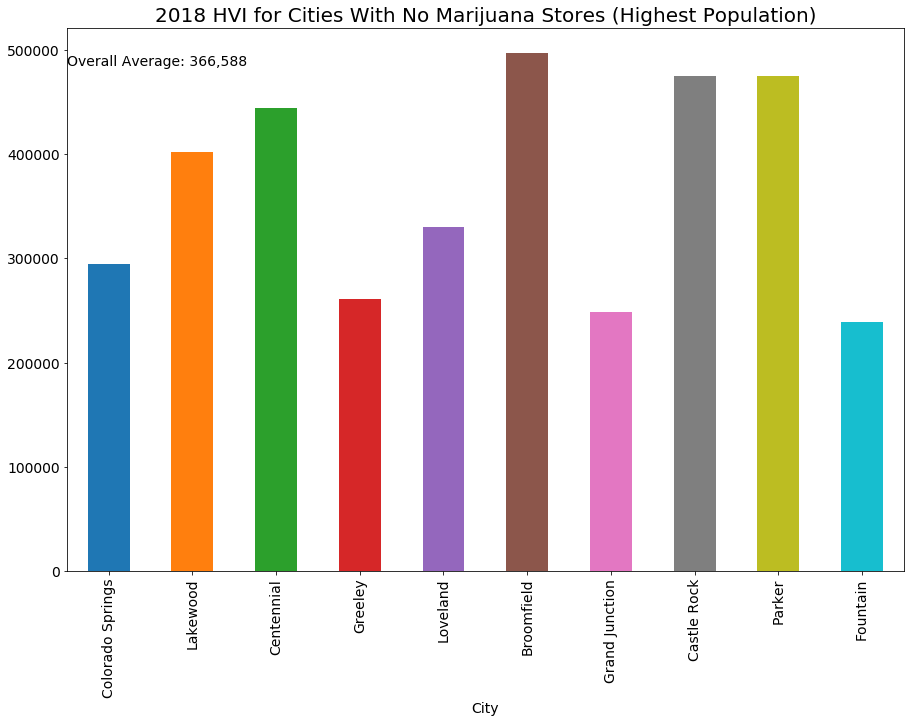

In [81]:
#Plot 2018 housing values for cities with no marijuana stores

overall_nomj_avg = round(top_10_nomj_df['2018'].mean(), 2)
overall_nomj_avg = int(overall_nomj_avg)
overall_nomj_avg = "{:,}".format(overall_nomj_avg)

overall_text = f'Overall Average: {overall_nomj_avg} '

ax = top_10_nomj_df.plot(kind="bar", y="2018", figsize=(15, 10), legend=False, fontsize=14)
ax.set_title('2018 HVI for Cities With No Marijuana Stores (Highest Population)', size=20)
ax.set_xlabel('City', size=14)
ax.text(0, .95, overall_text, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, size=14)

#Save the plot
plt.savefig("Images/2018 HVI for Cities With No Marijuana Stores.png")    
